### Map Input Data to Hash Bucket

This script is to map the input data to N hash-buckets  
Ex. Suppose there are 1 million KV pairs, then those would be mapped to N hash-buckets   
and statistics related to how many KV pairs are there in each hash bucket are collected

In [9]:
import json
from tqdm import tqdm
import hashlib
import pandas as pd
from collections import Counter

NBuckets = 10       # Number of buckets to map to
NumOfKVPairs = 10000000   # This is taken from your input dataset

# Read the input dataset JSON file
with open('input_data_10M.json', 'r') as openfile:
 
    # Reading from json file
    input_dataset = json.load(openfile)

In [14]:
NBucket_Count_Arr = {}      # Array containing the count of elements in each bucket
                            # For ex. arr[4] = 7 indicates there are 7 elements in 4th bucket

for key in tqdm(range(1, NumOfKVPairs)):
    value = input_dataset[str(key)]
    #print(f'Key={key} Value={value}')

    hash_value = hashlib.md5(bytes(value))
    bucketToMap = int(hash_value.hexdigest(), 16) % NBuckets
    
    if(bucketToMap not in NBucket_Count_Arr):
        NBucket_Count_Arr[bucketToMap] = 1
    else:
        NBucket_Count_Arr[bucketToMap] += 1


  0%|          | 588/9999999 [00:14<67:49:01, 40.96it/s]


KeyboardInterrupt: 

<Axes: xlabel='Bucket Lengths', ylabel='Number of Buckets'>

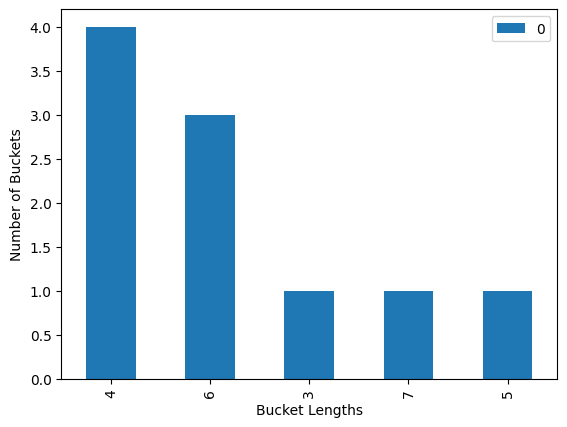

In [ ]:
#print(NBucket_Count_Arr)

count = Counter(NBucket_Count_Arr)
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar', xlabel='Bucket Lengths', ylabel='Number of Buckets')